# Biofuel Production Analysis:
### Decoding the global shift towards Renewable Bioenergy

## Dataset Story:
##### Entity: This shows countries or groups, giving us a big picture of biofuel production worldwide.

##### Year: Tells us the year the data is from, helping us see how biofuel production changes over time.

##### Biofuels Production - TWh - Total: This measures how much biofuel is produced, showing how much focus there is on renewable energy.

In [46]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('16 biofuel-production.csv')
df

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa (BP),NaN,1990,0.068617
1,Africa (BP),NaN,1991,0.068617
2,Africa (BP),NaN,1992,0.068805
3,Africa (BP),NaN,1993,0.068617
4,Africa (BP),NaN,1994,0.068617
...,...,...,...,...
1076,World,OWID_WRL,2017,968.131500
1077,World,OWID_WRL,2018,1067.184900
1078,World,OWID_WRL,2019,1114.488300
1079,World,OWID_WRL,2020,1046.644300


In [3]:
# Copy the unCleaned data:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             1081 non-null   object 
 1   Code                               800 non-null    object 
 2   Year                               1081 non-null   int64  
 3   Biofuels Production - TWh - Total  1081 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 33.9+ KB


In [4]:
data.shape

(1081, 4)

In [5]:
data.head()

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa (BP),NaN,1990,0.068617
1,Africa (BP),NaN,1991,0.068617
2,Africa (BP),NaN,1992,0.068805
3,Africa (BP),NaN,1993,0.068617
4,Africa (BP),NaN,1994,0.068617


In [6]:
data.tail()

,Entity,Code,Year,Biofuels Production - TWh - Total
1076,World,OWID_WRL,2017,968.1315
1077,World,OWID_WRL,2018,1067.1849
1078,World,OWID_WRL,2019,1114.4883
1079,World,OWID_WRL,2020,1046.6443
1080,World,OWID_WRL,2021,1083.6072


#### Check Entity column

In [7]:
data['Entity'].unique()         # How many values(country name) occur at least one. 

array(['Africa (BP)', 'Argentina', 'Asia Pacific (BP)', 'Australia',
       'Austria', 'Belgium', 'Brazil', 'CIS (BP)', 'Canada', 'China',
       'Colombia', 'Europe (BP)', 'European Union (27)', 'Finland',
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Mexico',
       'Middle East (BP)', 'Netherlands', 'Non-OECD (BP)',
       'North America (BP)', 'OECD (BP)', 'Poland', 'Portugal',
       'South Korea', 'South and Central America (BP)', 'Spain', 'Sweden',
       'Thailand', 'United Kingdom', 'United States', 'World'],
      dtype=object)

In [8]:
data['Entity'].nunique()      # 35 countries data

35

In [9]:
type(data['Entity'][0])           # data type of each value in Entity column.

str

In [10]:
data['Entity'].shape 

(1081,)

#### Check Code Column

In [11]:
type(data['Code'])

pandas.core.series.Series

In [12]:
type(data['Code'][0])

float

In [13]:
type(data['Code'][1067])             # Diffenert values has different type

str

In [14]:
data['Code'].unique()

array([nan, 'ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHN', 'COL', 'FIN',
       'FRA', 'DEU', 'IND', 'IDN', 'ITA', 'MEX', 'NLD', 'POL', 'PRT',
       'KOR', 'ESP', 'SWE', 'THA', 'GBR', 'USA', 'OWID_WRL'], dtype=object)

In [15]:
data['Code'].nunique()

25

In [16]:
data['Code'].value_counts()

ARG         32
ITA         32
USA         32
GBR         32
THA         32
SWE         32
ESP         32
KOR         32
PRT         32
POL         32
NLD         32
MEX         32
IDN         32
AUS         32
IND         32
DEU         32
FRA         32
FIN         32
COL         32
CHN         32
CAN         32
BRA         32
BEL         32
AUT         32
OWID_WRL    32
Name: Code, dtype: int64

In [17]:
data[data['Code'].isna()] 

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa (BP),NaN,1990,0.068617
1,Africa (BP),NaN,1991,0.068617
2,Africa (BP),NaN,1992,0.068805
3,Africa (BP),NaN,1993,0.068617
4,Africa (BP),NaN,1994,0.068617
...,...,...,...,...
884,South and Central America (BP),NaN,2017,247.706070
885,South and Central America (BP),NaN,2018,285.661100
886,South and Central America (BP),NaN,2019,299.175750
887,South and Central America (BP),NaN,2020,276.780200


In [18]:
data = data.drop('Code', axis = 1)  # drop the Code column because their is random missing of Code values.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             1081 non-null   object 
 1   Year                               1081 non-null   int64  
 2   Biofuels Production - TWh - Total  1081 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.5+ KB


In [20]:
data.describe()         # Shown the Statistics of the Numerical columns values.

,Year,Biofuels Production - TWh - Total
count,1081.000000,1081.000000
mean,2005.830712,56.543887
std,9.197525,138.262878
min,1990.000000,0.000000
25%,1998.000000,0.000000
50%,2006.000000,3.642700
75%,2014.000000,32.786575
max,2021.000000,1114.488300


#### check Year Column

In [21]:
data['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [22]:
data['Year'].nunique()

32

#### check 'Biofuels Production - TWh - Total' column

In [23]:
type(data['Biofuels Production - TWh - Total'][0])

numpy.float64

In [24]:
data['Biofuels Production - TWh - Total'].unique()

array([6.86167260e-02, 6.88047100e-02, 1.02925085e-01, 3.20697640e-01,
       3.31282940e-01, 3.65431640e-01, 4.19992540e-01, 4.48393320e-01,
       4.54163250e-01, 5.27325900e-01, 3.18050100e+00, 1.11104050e+00,
       1.24813760e+00, 1.26873950e+00, 1.29367540e+00, 1.51343990e+00,
       1.75311160e+00, 1.76276580e+00, 1.23002220e+00, 1.44724620e+00,
       1.45002260e+00, 1.43307390e+00, 1.43588580e+00, 0.00000000e+00,
       5.32060340e-02, 1.06121324e-01, 1.06412070e-01, 3.52672340e-01,
       2.00785800e+00, 7.11229040e+00, 1.19650880e+01, 1.98939440e+01,
       2.58448160e+01, 2.65025370e+01, 2.38386860e+01, 3.05844230e+01,
       2.34618450e+01, 3.27682840e+01, 3.62318700e+01, 3.17034280e+01,
       2.85500300e+01, 1.67439610e+01, 2.37799030e+01, 9.97668300e-01,
       1.08231150e+00, 2.87695840e+00, 6.54071660e+00, 6.59837250e+00,
       1.04751270e+01, 1.70878720e+01, 2.35589000e+01, 3.80934070e+01,
       3.96153030e+01, 4.28216740e+01, 6.88130340e+01, 8.18184800e+01,
      

In [25]:
data['Biofuels Production - TWh - Total'].nunique()

761

In [26]:
data['Biofuels Production - TWh - Total'].std()

138.2628780164389

In [27]:
formatted_value = data['Biofuels Production - TWh - Total'].apply(lambda x: round(x,3)).astype(float)

In [28]:
data['Biofuels Production - TWh - Total'] = formatted_value

In [29]:
data.head()

,Entity,Year,Biofuels Production - TWh - Total
0,Africa (BP),1990,0.069
1,Africa (BP),1991,0.069
2,Africa (BP),1992,0.069
3,Africa (BP),1993,0.069
4,Africa (BP),1994,0.069


###  Measure of variability or fluctuations in biofuel production on a yearly basis.

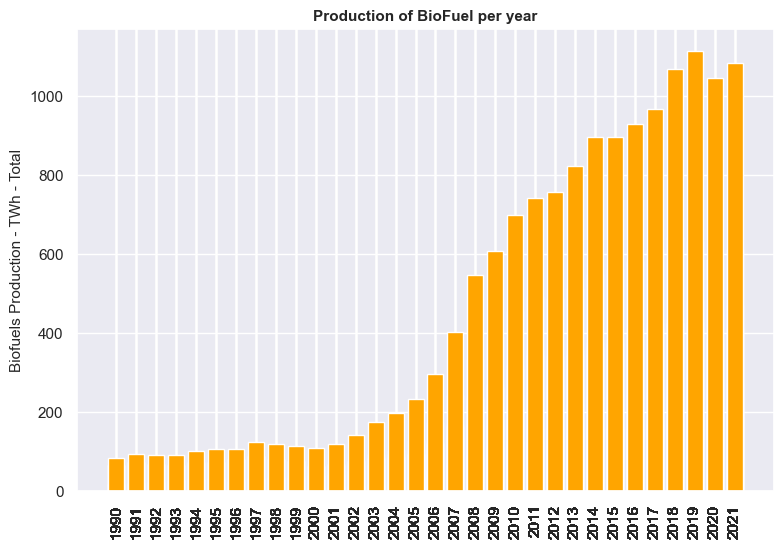

In [30]:
plt.figure(figsize = (9,6))
plt.bar(x= data['Year'], height = data['Biofuels Production - TWh - Total'], color = 'orange')
plt.xticks(ticks=data['Year'], labels=data['Year'], rotation=90) 
plt.yticks(fontsize = 11)
plt.title("Production of BioFuel per year", fontsize= 11, fontweight='bold')
plt.ylabel('Biofuels Production - TWh - Total', fontsize= 11)
plt.show()

##### The use of orange bars helps to emphasize the variability, drawing attention to years with higher deviations.
##### These variations suggest differing rates of biofuel production growth, which could be attributed to market conditions,
##### policy changes, or advancements in biofuel technologies. The graph serves as an important tool for investors and policymakers
##### to understand the stability and risk associated with the biofuel market.

In [31]:
df = data.copy()
df.head()

,Entity,Year,Biofuels Production - TWh - Total
0,Africa (BP),1990,0.069
1,Africa (BP),1991,0.069
2,Africa (BP),1992,0.069
3,Africa (BP),1993,0.069
4,Africa (BP),1994,0.069


In [36]:
# Standard deviation is the measure of amount of variation of data.

Yearly_variation = df.groupby('Year')['Biofuels Production - TWh - Total'].std().reset_index()

In [40]:
fig = go.Figure(data=[
    go.Bar(
        x=Yearly_variation['Year'],
        y=Yearly_variation['Biofuels Production - TWh - Total'],
        marker_color='orange'
    )
])

fig.update_layout(
    title='Annual Volatility in Biofuel Production',
    xaxis=dict(title='Year', tickmode='linear'),
    yaxis=dict(title='Standard Deviation of Biofuels Production (TWh)'),
    showlegend=False
)

fig.show()

 Graph Analysis: 
  The bar chart shows how global biofuel production has changed over the years, using standard deviation values. The orange bars   highlight years with bigger changes, indicating more variability. These ups and downs might be due to market shifts, policy     changes, or improvements in biofuel tech. Investors and policymakers can use this graph to see how stable or risky the biofuel   market is.

## Total Biofuel production

In [43]:
grouped_entities = df[df['Entity'].str.contains("World|OECD|G20|EU|America|Asia|Europe|Africa")]
group_biofuel_total = grouped_entities.groupby('Entity')['Biofuels Production - TWh - Total'].sum().sort_values(ascending = False).reset_index()
group_biofuel_total

,Entity,Biofuels Production - TWh - Total
0,World,14871.721
1,OECD (BP),8625.903
2,Non-OECD (BP),6245.818
3,North America (BP),6063.097
4,South and Central America (BP),4751.961
5,Europe (BP),2394.277
6,European Union (27),2289.421
7,Asia Pacific (BP),1632.945
8,Africa (BP),23.890


In [47]:
fig = px.bar(group_biofuel_total, 
             y='Entity', 
             x='Biofuels Production - TWh - Total', 
             title='Total Biofuel Production',
             labels={'Entity': 'Group', 'Biofuels Production - TWh - Total': 'Total Biofuels Production (TWh)'},
             color='Biofuels Production - TWh - Total', 
             color_continuous_scale='viridis')

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

Graph Analysis: This bar chart shows the global hierarchy of biofuel production among different entities and regions. The color gradient from purple to green helps visualize the varying levels of production, emphasizing the dominance of certain groups. The descending order reveals a notable disparity in production, indicating that biofuel generation is concentrated in specific areas. This highlights the importance of geopolitical and economic alliances in influencing global biofuel production.

## Biofuel Production in United states

In [49]:
us_biofuel_data = df[df['Entity'] == 'United States']

fig_us = px.line(us_biofuel_data, 
                 x='Year', 
                 y='Biofuels Production - TWh - Total', 
                 markers=True,
                 title="Biofuel Production in the United States  over time",
                 labels={'Biofuels Production - TWh - Total': 'Biofuels Production (TWh)', 'Year': 'Year'})

fig_us.update_traces(line_color='green')
fig_us.update_layout(xaxis_title='Year',
                     yaxis_title='Biofuels Production (TWh)')


Graph Analysis: The line chart reveals a decade of biofuel production trends in the United States, showcasing a pattern of growth. The use of green lines symbolizes the eco-friendly nature of biofuels. Observing the yearly data points, one can discern the impact of policy, technology, and market demand on the biofuel industry. This visualization effectively communicates the progressive steps taken towards sustainable energy over the years.

## Regional Biofuel Production Over Time

In [53]:
regional_entities = ['Germany', 'China', 'United States']
regional_data = df[df['Entity'].isin(regional_entities)]

# Create a line plot for each regional entity
fig_regional = px.line(regional_data, 
                       x='Year', 
                       y='Biofuels Production - TWh - Total', 
                       color='Entity',
                       markers=True,
                       title="Biofuel Production in Selected Countries Over Time",
                       labels={'Biofuels Production - TWh - Total': 'Biofuels Production (TWh)', 'Year': 'Year'},
                       color_discrete_map={'Germany': 'blue', 'China': 'red', 'United States': 'green'})

# Update line colors
fig_regional.update_traces(line=dict(width=2.5))

# Update layout
fig_regional.update_layout(xaxis_title='Year',
                           yaxis_title='Biofuels Production (TWh)',
                          legend_title='Country/Region',
                          template='plotly_dark')

# Show the plot
fig_regional.show()

Graph Analysis: This chart compares biofuel production trends in Germany, China, and the United States over time. Each country has its own line, with bold markers showing specific data points. The dark theme makes it easy to see the trends, showing how biofuel production has evolved in these important economies.

In [56]:
specified_countries = ["China", "United States", "India", "Japan", "Germany", "Italy", "United Kingdom", "France", "Australia", "Spain", "United States", "Brazil", "Canada", "South Korea", "Mexico", "Netherlands", "Switzerland", "Sweden", "Belgium", "Poland"]

specified_countries_data = df[df['Entity'].isin(specified_countries)]

total_biofuel_production_specified_countries = specified_countries_data.groupby('Entity')['Biofuels Production - TWh - Total'].sum().sort_values(ascending=False)

# Create the figure
fig = go.Figure()

# Add bars to the figure
fig.add_trace(go.Bar(
    x=total_biofuel_production_specified_countries.index,  # Country names
    y=total_biofuel_production_specified_countries.values,  # Biofuels production values
    marker_color='skyblue',  # Color of the bars
))

# Update layout
fig.update_layout(
    title='Total Biofuel Production of Specified Countries',
    xaxis=dict(title='Country', tickangle=90, tickfont=dict(size=10)),
    yaxis=dict(title='Biofuels Production (TWh)', tickfont=dict(size=10)),
    font=dict(size=12, color='black'),  # Title and label font settings
    plot_bgcolor='white',  # Background color
    bargap=0.15,  # Gap between bars
    margin=dict(l=50, r=50, t=80, b=50),  # Margins
)

# Show the plot
fig.show()

In [58]:
# Create a bar chart with Plotly Express
fig = px.bar(total_biofuel_production_specified_countries,
             x=total_biofuel_production_specified_countries.index,
             y=total_biofuel_production_specified_countries.values,
             color=total_biofuel_production_specified_countries.values,  # Assign colors based on values
             color_continuous_scale='Plasma',  # Choose a color scale
             labels={'x': 'Country', 'y': 'Biofuels Production (TWh)'},
             title='Total Biofuel Production of Specified Countries')

# Update layout
fig.update_layout(xaxis_tickangle=90, xaxis_tickfont=dict(size=10),
                  yaxis=dict(title='Biofuels Production (TWh)', tickfont=dict(size=10)),
                  font=dict(size=12, color='black'),  # Update font size and color
                  plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
                  coloraxis_colorbar=dict(title='Biofuels Production (TWh)'))  # Update color bar title

fig.show()

Graph Analysis: This bar chart showcases the total biofuel production across selected major countries.The visualization effectively ranks countries by their biofuel output, revealing leaders in the sector and comparative standings. Notably, the chart conveys the diverse commitment to biofuel production, serving as a benchmark for assessing global bioenergy priorities and investments.

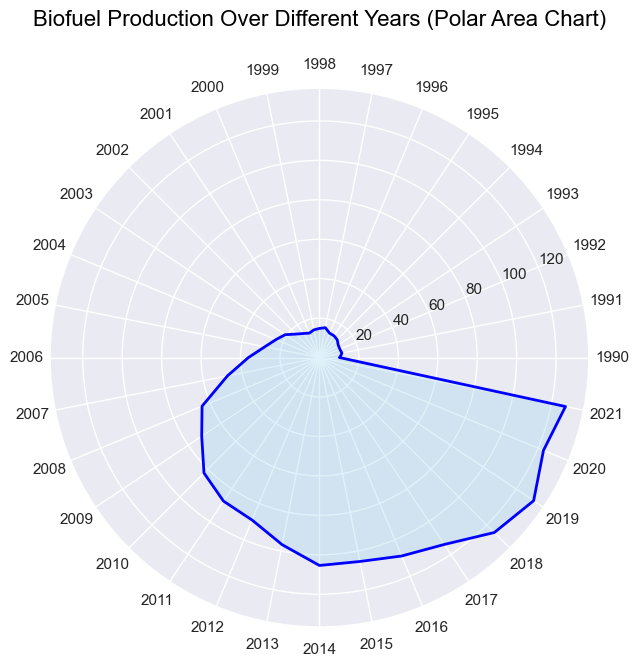

In [61]:
df_polar_area = df.groupby('Year')['Biofuels Production - TWh - Total'].mean().reset_index()

df_polar_area['Year'] = df_polar_area['Year'].astype('category')

num_vars_polar = df_polar_area['Year'].nunique()

angles_polar = np.linspace(0, 2 * np.pi, num_vars_polar, endpoint=False).tolist()

stats_polar = df_polar_area['Biofuels Production - TWh - Total'].tolist()

stats_polar += stats_polar[:1]
angles_polar += angles_polar[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.fill(angles_polar, stats_polar, color='skyblue', alpha=0.25)
ax.plot(angles_polar, stats_polar, color='blue', linewidth=2) 

ax.set_xticks(angles_polar[:-1])
ax.set_xticklabels(df_polar_area['Year'])

plt.title('Biofuel Production Over Different Years (Polar Area Chart)', size=16, color='black', y=1.1)

plt.show()

Graph Analysis: The polar area chart elegantly displays the annual mean biofuel production, providing a 360-degree view of the data over various years. The shades of blue and the radial spread of the data points encapsulate the fluctuations and trends in biofuel production. This visualization method offers a unique perspective, highlighting the cyclical nature and potential seasonality in biofuel output, while also emphasizing years of significant production through the broader spans of the chart.

## conclusion and Final Thoughts and Insights

Conclusion: The biofuel production dataset unveils the story of bioenergy's vital role in the renewable energy landscape. It showcases progress and underscores biofuels' significance in diversifying energy sources and promoting sustainability. The increasing production across regions reflects global efforts to reduce reliance on fossil fuels and combat climate change. Beyond numbers, this journey highlights collaborative efforts, policy support, and technological innovation driving sustainable energy transitions. Positioned at the forefront, the dataset not only records historical trends but also foresees biofuels as integral to a cleaner, renewable future. It calls for continued exploration and investment in biofuels to realize a sustainable world for all.